In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
import time

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_500_2021q2','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Kraków,Podgórze,małopolskie,50.036500,20.015500,wtorny,46.30,2,6,8,2021.0,464000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,10021.598272,242
1,Warszawa,Praga-Południe,mazowieckie,52.238088,21.115236,wtorny,80.91,2,2,5,2013.0,849000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,10493.140527,142
2,Katowice,Os. Paderewskiego,śląskie,50.252783,19.038932,pierwotny,44.21,2,1,9,2023.0,373100.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,8439.267134,326
3,Warszawa,Wola,mazowieckie,52.234980,20.961730,wtorny,34.00,1,1,5,1952.0,409900.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,12055.882353,412
4,Poznań,Stare Miasto,wielkopolskie,52.453445,16.915134,wtorny,46.70,2,1,15,1984.0,329000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7044.967880,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50411,Kołobrzeg,kołobrzeski,zachodniopomorskie,54.175917,15.583267,wtorny,27.00,2,parter,2,1948.0,340000.0,https://gratka.pl/nieruchomosci/mieszkanie-kol...,12592.592593,274
50412,Pruszków,pruszkowski,mazowieckie,52.155775,20.804646,wtorny,48.42,2,2,3,2019.0,539000.0,https://gratka.pl/nieruchomosci/mieszkanie-pru...,11131.763734,245
50413,Kraków,Os. Prądnik Biały,małopolskie,50.092900,19.926700,pierwotny,54.00,3,4,5,2020.0,499002.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,9240.777778,264
50414,Warszawa,Bielany,mazowieckie,52.267688,20.947620,wtorny,82.00,2,11,11,2001.0,940000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,11463.414634,350


## data preparation

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50416 entries, 0 to 50415
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            50416 non-null  object 
 1   district        42465 non-null  object 
 2   voivodeship     50416 non-null  object 
 3   localization_y  50416 non-null  float64
 4   localization_x  50416 non-null  float64
 5   market          50416 non-null  object 
 6   area            50416 non-null  float64
 7   rooms           50416 non-null  object 
 8   floor           50416 non-null  object 
 9   floors          50416 non-null  object 
 10  build_yr        50416 non-null  float64
 11  price           50416 non-null  float64
 12  url             50416 non-null  object 
 13  price_of_sqm    50416 non-null  float64
 14  cluster         50416 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 5.6+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price_of_sqm','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50416 entries, 0 to 50415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   market    50416 non-null  object 
 1   rooms     50416 non-null  object 
 2   floor     50416 non-null  object 
 3   floors    50416 non-null  object 
 4   build_yr  50416 non-null  float64
 5   price     50416 non-null  float64
 6   cluster   50416 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.7+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,2021.0,464000.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013.0,849000.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023.0,373100.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1952.0,409900.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1984.0,329000.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50411,1948.0,340000.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50412,2019.0,539000.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50413,2020.0,499002.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50414,2001.0,940000.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price',axis=1).values
y = frame.price.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(len(y_train),1))
y_train = y_train.reshape(len(y_train),) # for regressor

## svr and grid search

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [17]:
# parameters = [{'C':[100, 1000],
#                'kernel':['rbf'],
#                'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]

In [18]:
# grid_search = GridSearchCV(estimator = SVR(),
#                            param_grid = parameters,
#                            scoring = 'r2',
#                            cv = 10,
# #                            n_jobs = -1,
#                           )

In [19]:
# start = time.time()

# grid_search = grid_search.fit(X_train, y_train)

# stop = time.time()
# print('\n',(stop-start)//60,'min.')

In [20]:
# grid_search.best_score_

In [21]:
# grid_search.best_params_

In [22]:
# pd.DataFrame(grid_search.cv_results_)

In [23]:
start = time.time()

model = SVR(C = 1000,kernel = 'rbf',gamma = 0.1)
model.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 190.0 min.


## model evaluation

In [24]:
from sklearn.metrics import r2_score

In [26]:
start = time.time()

predictions = model.predict(X_test)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 3.0 min.


In [27]:
predictions = sc_y.inverse_transform(predictions)

In [28]:
r2_score(y_test,predictions)

0.3189478290239798

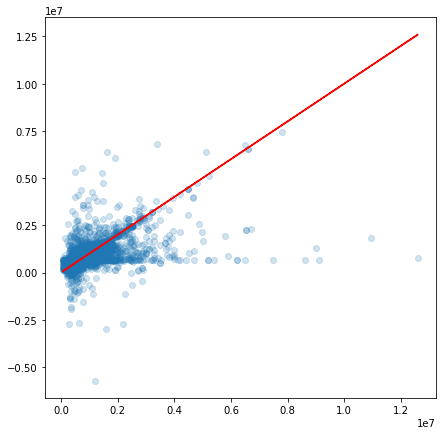

In [29]:
plt.figure(figsize=(7,7))
# plt.xlim(700,2500)
# plt.ylim(0,500)

# predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# perfect predictions
plt.plot(y_test,y_test,'r')

In [30]:
predictions

array([ 371885.01303785,  431659.70358973,  414893.81757677, ...,
        643910.22577845, 2199587.21948808,  581079.70936453])

In [31]:
predictions[:20]/y_test[:20]

array([1.12692428, 0.88273968, 1.14177865, 0.93771361, 0.94958194,
       1.04393768, 0.90051565, 1.19081634, 2.12028943, 1.08201351,
       1.63305275, 1.52109195, 0.97588039, 1.34751132, 0.94151307,
       2.59267522, 1.17928254, 1.53151863, 1.10445084, 0.99069777])

## k-Fold Cross Validation

In [32]:
# from sklearn.model_selection import cross_val_score

In [33]:
# accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

In [34]:
# accuracies.mean()

In [35]:
# accuracies.std()

In [36]:
# accuracies